# 02. PyTorch Neural Network Classification

In [1]:
from sklearn.datasets import make_circles
import torch
import torch.nn as nn
from matplotlib import pyplot as plt
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

# Device Setup
device = "cpu"
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
print(f"Using device: {device}, with torch version: {torch.__version__}")

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, noise=0.03, random_state=42)
print(f"First 5 samples of X:\n{X[:5]}")
print(f"First 5 labels of y:\n{y[:5]}")

helper_functions.py already exists, skipping download
Using device: mps, with torch version: 2.9.0
First 5 samples of X:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 labels of y:
[1 1 1 1 0]


In [2]:
# Make DataFrames of the circles data
import pandas as pd

circles = pd.DataFrame({
    "X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


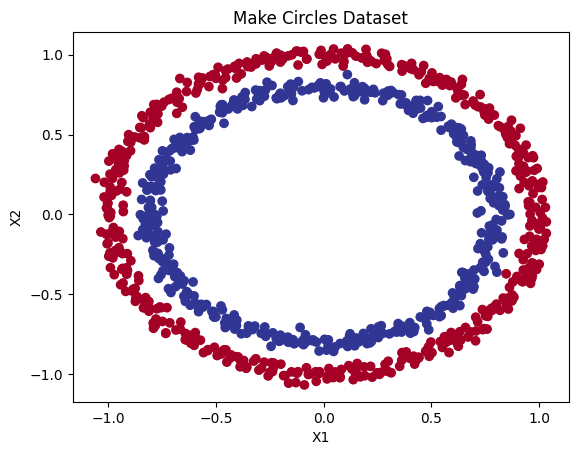

In [3]:
# Visualize with a scatter plot
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Make Circles Dataset")
plt.show()

In [4]:
print(f"{X.shape=}, {y.shape=}")
X, y = torch.tensor(X).type(torch.float).to(device), torch.tensor(y).type(torch.float).to(device)

print(f"{X[:5]=}, \n{y[:5]=}")

X.shape=(1000, 2), y.shape=(1000,)
X[:5]=tensor([[ 0.7542,  0.2315],
        [-0.7562,  0.1533],
        [-0.8154,  0.1733],
        [-0.3937,  0.6929],
        [ 0.4422, -0.8967]], device='mps:0'), 
y[:5]=tensor([1., 1., 1., 1., 0.], device='mps:0')


In [5]:
# Train/Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"{X_train.shape=}, {X_test.shape=}, {y_train.shape=}, {y_test.shape=}")

X_train.shape=torch.Size([800, 2]), X_test.shape=torch.Size([200, 2]), y_train.shape=torch.Size([800]), y_test.shape=torch.Size([200])


## Building a model

In [ ]:
class CircleModelV0(nn.Module):
    # Initialize the model
    def __init__(self):
        super().__init__()
        # 2 layers, 
        # layer 1: input 2 features, output 5 features
        # layer 2: input 5 features, output 1 feature
        self.layer_1 = nn.Linear(in_features=2, out_features=16)
        self.layer_2 = nn.Linear(in_features=16, out_features=16)
        self.layer_3 = nn.Linear(in_features=16, out_features=1)
        self.relu = nn.LeakyReLU()
    
    # Pass through all layers
    def forward(self, x):
        x = self.layer_1(x)
        x = self.relu(x)
        x = self.layer_2(x)
        x = self.relu(x)
        x = self.layer_3(x)
        return x
    
# Creating an instance of the model
model_0 = CircleModelV0().to(device)
print(model_0)
print(f"Number of parameters in model: {sum(p.numel() for p in model_0.parameters())}")
# print(f"{model_0.state_dict()=}")

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=16, bias=True)
  (layer_2): Linear(in_features=16, out_features=16, bias=True)
  (layer_3): Linear(in_features=16, out_features=1, bias=True)
)
Number of parameters in model: 337


In [7]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.1)

def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

Epoch: 0 | Train Loss: 0.71368 | Train Acc: 50.00000 | Test Loss: 0.79741 | Test Acc: 50.00000
Epoch: 20 | Train Loss: 0.69383 | Train Acc: 50.00000 | Test Loss: 0.69658 | Test Acc: 47.50000
Epoch: 40 | Train Loss: 0.69325 | Train Acc: 54.12500 | Test Loss: 0.69473 | Test Acc: 51.00000
Epoch: 60 | Train Loss: 0.69301 | Train Acc: 51.75000 | Test Loss: 0.69518 | Test Acc: 46.00000
Epoch: 80 | Train Loss: 0.69298 | Train Acc: 51.12500 | Test Loss: 0.69456 | Test Acc: 46.00000
Epoch: 100 | Train Loss: 0.69298 | Train Acc: 50.62500 | Test Loss: 0.69468 | Test Acc: 45.50000
Epoch: 120 | Train Loss: 0.69298 | Train Acc: 51.12500 | Test Loss: 0.69466 | Test Acc: 45.50000
Epoch: 140 | Train Loss: 0.69298 | Train Acc: 51.12500 | Test Loss: 0.69469 | Test Acc: 46.00000
Epoch: 160 | Train Loss: 0.69298 | Train Acc: 51.00000 | Test Loss: 0.69468 | Test Acc: 46.00000
Epoch: 180 | Train Loss: 0.69298 | Train Acc: 51.00000 | Test Loss: 0.69468 | Test Acc: 46.00000
Epoch: 200 | Train Loss: 0.69298 | T

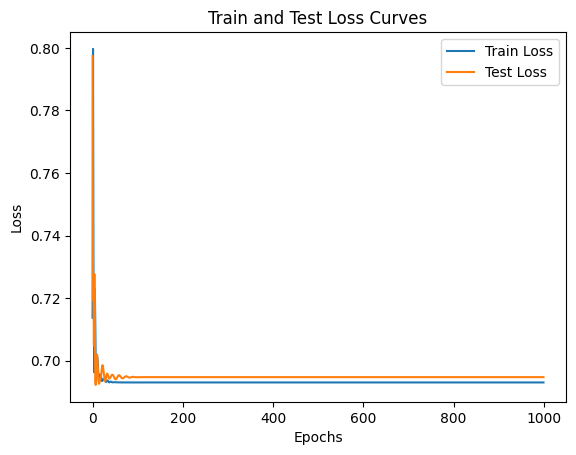

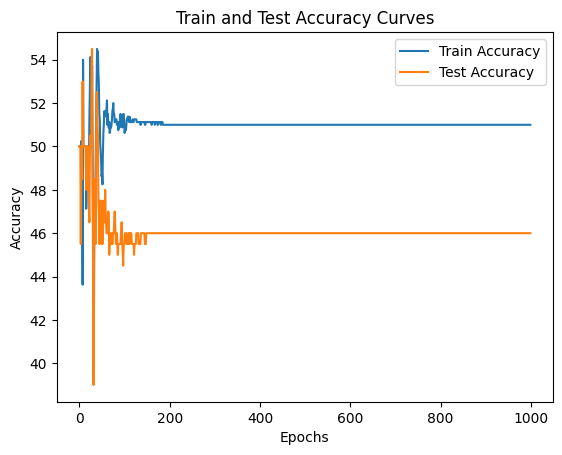

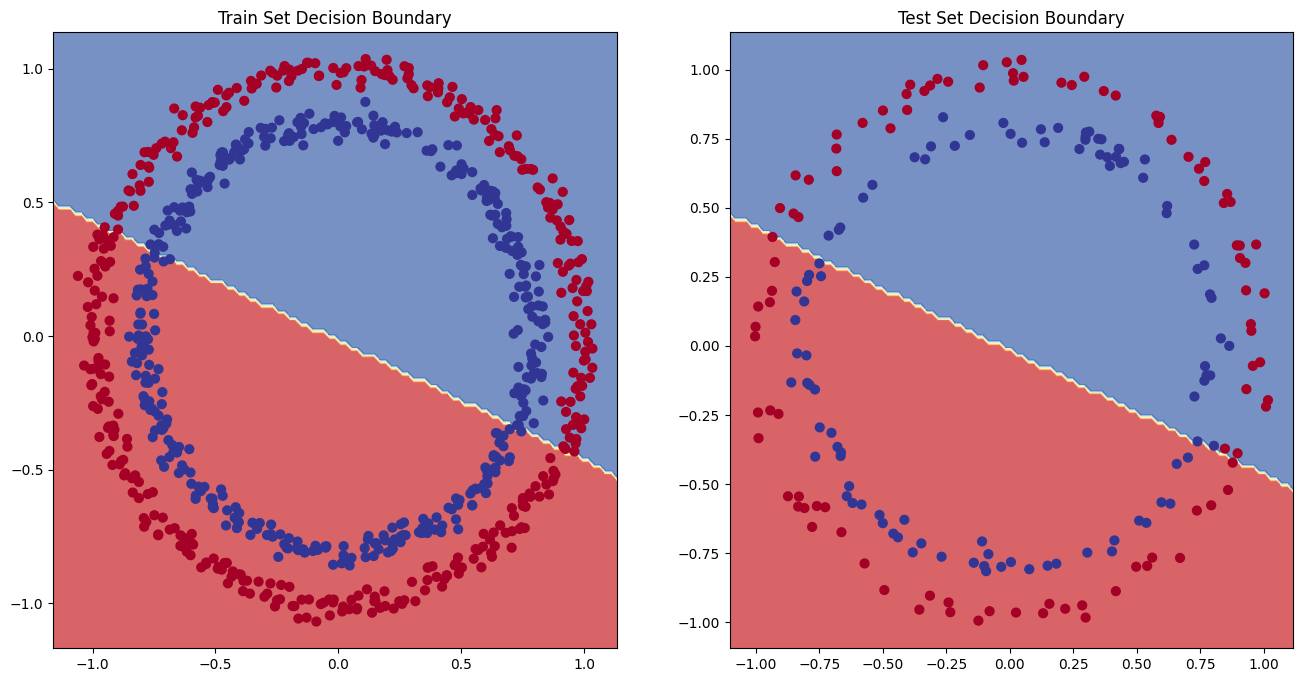

In [8]:
# Train/Test Loop
torch.manual_seed(42)
epochs = 1000

# Init empty lists to store loss values
train_loss_values = []
test_loss_values = []
train_acc_values = []
test_acc_values = []
epochs_list = []

for epoch in range(epochs):
    # 0. Set model to train mode
    model_0.train()

    # 1. Forward pass
    y_logits = model_0(X_train).squeeze()  # Squeeze to remove extra dimensions
    y_pred = torch.round(torch.sigmoid(y_logits))  # Convert logits to prediction probabilities

    # 2. Calculate loss
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

    # 3. Zero gradients
    optimizer.zero_grad()

    # 4. Backward pass
    loss.backward()

    # 5. Update weights
    optimizer.step()

    # Set model to eval mode
    model_0.eval()
    with torch.inference_mode():
        # Forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # Calculate test loss
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

    # Every 20 epochs, calculate and print out test loss
    if epoch % 20 == 0:    
        # Print out what's happening
        print(f"Epoch: {epoch} | Train Loss: {loss:.5f} | Train Acc: {acc:.5f} | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.5f}")

#     # Append loss values to lists
    train_loss_values.append(loss.cpu().item())
    train_acc_values.append(acc)
    test_loss_values.append(test_loss.cpu().item())
    test_acc_values.append(test_acc)
    epochs_list.append(epoch)

# # Plot the loss curves
plt.plot(epochs_list, train_loss_values, label="Train Loss")
plt.plot(epochs_list, test_loss_values, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Test Loss Curves")
plt.legend()
plt.show()

# # plot the accuracy curves
plt.plot(epochs_list, train_acc_values, label="Train Accuracy")
plt.plot(epochs_list, test_acc_values, label="Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Train and Test Accuracy Curves")
plt.legend()
plt.show()

# Plot decidion boundary
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.title("Train Set Decision Boundary")
plot_decision_boundary(model_0, X_train.cpu(), y_train.cpu())
plt.subplot(1, 2, 2)
plt.title("Test Set Decision Boundary")
plot_decision_boundary(model_0, X_test.cpu(), y_test.cpu())
plt.show()